In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import glob, os
# from s2sphere import CellId, LatLng
import datetime
import pytz

In [13]:
def local_datetime_from_timestamp(timestamp, tz_info):
    utc_datetime = datetime.datetime.utcfromtimestamp(timestamp)
    return utc_datetime.replace(tzinfo=pytz.timezone('UTC')).astimezone(tz_info)

In [14]:
def file_slicing(file_path):
    data = pd.read_csv(file_path, sep=" ", header=None)
    data.columns = ["lat", "long", "occupied", "unixtime"]
    data['cab_name'] = pd.Series(file_path, index=data.index)
    data_sort = data.sort_values(by=['cab_name', 'unixtime'])

    data_sort['dt_ts'] = data_sort.apply(
    lambda row: str(local_datetime_from_timestamp(row['unixtime'], pytz.timezone('America/Los_Angeles')))[:19],
        axis = 1
    )
    data_sort = data_sort.reset_index(drop=True)

    data_sort['last_occupied'] = data_sort.occupied.shift(+1)
    data_sort['next_occupied'] = data_sort.occupied.shift(-1)
    data_sort['is_pickup'] = ((data_sort['occupied'] - data_sort['last_occupied']) == 1)
    data_sort['is_dropoff'] = ((data_sort['occupied'] - data_sort['next_occupied']) == 1)
    
    if data_sort.loc[0, 'occupied'] == 1:
        data_sort.loc[0, 'is_pickup'] = True

    if data_sort.loc[len(data_sort)-1, 'occupied'] == 1:
        data_sort.loc[len(data_sort)-1, 'is_dropoff'] = True

    data_sliced = data_sort[(data_sort['is_pickup'] == True) | (data_sort['is_dropoff'] == True)]
    data_sliced = data_sliced[(data_sliced['is_pickup'] == False) | (data_sliced['is_dropoff'] == False)]
    data_sliced = data_sliced.reset_index(drop=True)
    data_sliced = data_sliced.drop(['last_occupied', 'next_occupied','occupied','cab_name'], axis=1)
    return data_sliced

In [15]:
def collapse_pick_drop(data_sliced, file_name):
    # assert (len(data_sliced)%2 == 0)
    data_start_end = pd.DataFrame()
    i = 0
    last_line = len(data_sliced) - 1

    if data_sliced.loc[0,'is_dropoff']: # first line is dropoff
        print(file_name, ": first line dropoff")
        # return
    elif data_sliced.loc[len(data_sliced)-1,'is_pickup']: # last line is pickup
        print(file_name, ": last line pickup")
        # return
    elif sum(np.where(data_sliced['is_pickup'] , 1, 0)) != sum(np.where(data_sliced['is_dropoff'], 1, 0)):
        print(file_name, ": pickup dropoff # not match")
        # return
    else:

        pick = data_sliced.iloc[::2]
        pick = pick.reset_index(drop=True)
        dropoff = data_sliced.iloc[1::2]
        dropoff = dropoff.reset_index(drop=True)
        if sum(np.where(pick['is_pickup'] == True, 0, 1)) == 0 and sum(np.where(dropoff['is_dropoff'] == True, 0, 1)) == 0:
            data_joined = pick.merge(dropoff, left_index=True, right_index=True, how='inner')
            data_joined = data_joined[['lat_y', 'long_y','lat_x', 'long_x', 'dt_ts_y', 'dt_ts_x']]
            return data_joined

In [24]:
def clean_outside_data(data_start_end):
    SF_zipcode = [94102, 94103, 94104, 94105, 94107, 94108, 94109, 94110, 94111, 94112,
              94114, 94115, 94116, 94117, 94118, 94121, 94122, 94123, 94124, 94127,
              94129, 94130, 94131, 94132, 94133, 94134, 94158]
    SF_lat_min = 37.71
    SF_lat_max = 37.82
    SF_long_max = -122.36
    SF_long_min = -122.52
    
    data_start_end = data_start_end[(data_start_end['lat_y'] >= SF_lat_min) & (data_start_end['lat_y'] <= SF_lat_max)]
    data_start_end = data_start_end[(data_start_end['lat_x'] >= SF_lat_min) & (data_start_end['lat_x'] <= SF_lat_max)]
    data_start_end = data_start_end[(data_start_end['long_y'] >= SF_long_min) & (data_start_end['long_y'] <= SF_long_max)]
    data_start_end = data_start_end[(data_start_end['long_x'] >= SF_long_min) & (data_start_end['long_x'] <= SF_long_max)]
    
    return data_start_end

In [28]:
files = glob.glob('../data/sf/*.txt')
# files = [files[4]]

for file_path in files:

    file_name = os.path.basename(file_path).split('.')[0]
    print(file_name)
    dirname = os.path.dirname(file_path)
    new_file_path = os.path.join("../data/sf/output".format(dirname), "{}_collapsed.csv".format(file_name))
    data_sliced = file_slicing(file_path)
    data_start_end = collapse_pick_drop(data_sliced, file_name)
    cleaned_data = clean_outside_data(data_start_end)
    if cleaned_data is not None:
        with open(new_file_path, 'w') as f:
             data_start_end.to_csv(new_file_path, sep=',', encoding='utf-8', index=False)

print("done")

new_adkavy
new_ackgrica
new_iafstnue
new_ogijtri
new_umhenwed
new_ovkojy
new_obheujvo
new_oygvar
new_ekfrab
new_ugatna
new_eoivqued
new_aldhidd
new_ajthof
new_iorjtwav
new_ikujfurk
new_upthin
new_ancedvab
new_eytups
new_amnurgji
new_ansyut
new_ujtosh
new_ainplin
new_iagods
new_isvayd
new_aupclik
new_askmecle
new_epkiapme
new_inlica
new_ogdygdyd
new_ubzachy
new_igvidth
new_ecdiwovu
new_ilkedve
new_ujhuki
new_epemvagu
new_imhacy
new_ichikiga
new_ojbaso
new_eggfrij
new_oiphye
new_uvreoipy
new_enjubpl
new_ankped
new_avpavi
new_ecgojtyt
new_ibflsruc
new_ugifmav
new_ioajdig
new_ikkimm
new_elbnaxa
new_owgves
new_ocjeng
new_avglybic
new_epabcadu
new_idvowwed
new_agcowktu
new_ibgryk
new_iatmeuns
new_oadwowd
new_eydadgio
new_oilrag
new_ucdewy
new_idtwal
new_odoywug
new_inshfola
new_eufdod
new_ictmuog
new_efgoaku
new_edodblea
new_ebstic
new_owufrey
new_ayshowg
new_acgerl
new_aggjuo
new_omdrid
new_afsfat
new_ellimtbu
new_ojumna
new_atidfi
new_ifragcic
new_odlorhem
new_aviltly
new_okblahed
new_eshr

In [29]:
import matplotlib.pyplot as plt

SF_lat_min = 37.71
SF_lat_max = 37.82
SF_long_max = -122.36
SF_long_min = -122.52

In [37]:
sf_data = pd.read_csv('../data/sf/output/sf_data.csv', sep=",")
sf_data.head(5)

,lat_y,long_y,lat_x,long_x,dt_ts_y,dt_ts_x
0,37.75552,-122.41438,37.74977,-122.39724,2008-05-17 07:55:58,2008-05-17 07:51:10
1,37.75177,-122.43095,37.75053,-122.42086,2008-05-17 08:21:48,2008-05-17 08:18:06
2,37.77188,-122.41825,37.77173,-122.41838,2008-05-17 08:45:51,2008-05-17 08:43:51
3,37.61765,-122.38738,37.77181,-122.41833,2008-05-17 09:02:46,2008-05-17 08:46:08
4,37.79160,-122.41249,37.75240,-122.41842,2008-05-17 09:34:28,2008-05-17 09:18:40


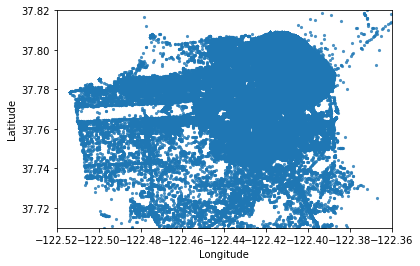

In [39]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(sf_data.long_x, sf_data.lat_x, s=10, lw=0, alpha=0.8)
ax.set_xlim(SF_long_min, SF_long_max)
ax.set_ylim(SF_lat_min, SF_lat_max)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

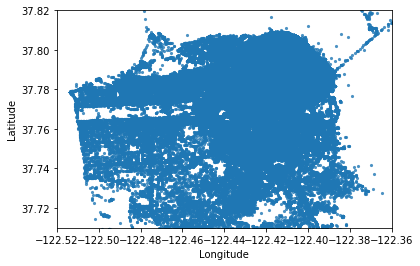

In [40]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(sf_data.long_y, sf_data.lat_y, s=10, lw=0, alpha=0.8)
ax.set_xlim(SF_long_min, SF_long_max)
ax.set_ylim(SF_lat_min, SF_lat_max)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()